In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import random
import argparse
from tensorflow.keras.models import model_from_json, Model
from tensorflow.keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

Using TensorFlow backend.


In [2]:
def plot_history(history, loss_name, metric_name,title):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle(title)
    ax1.set_ylabel(loss_name)
    ax1.set_xlabel('epoch')
    ax1.set_yscale('log')
    ax2.set_ylabel(metric_name)
    ax2.set_xlabel('epoch')
    ax1.plot(history.history['loss'], label = "training")
    ax1.plot(history.history['val_loss'], label = "validation")
    ax2.plot(history.history[metric_name], label = "training")
    ax2.plot(history.history['val_'+metric_name], label = "validation")
    ax1handles, ax1labels = ax1.get_legend_handles_labels()
    if len(ax1labels) > 0:
        ax1.legend(ax1handles, ax1labels)
    ax2handles, ax2labels = ax2.get_legend_handles_labels()
    if len(ax2labels) > 0:
        ax2.legend(ax2handles, ax2labels)
    fig.tight_layout()
    plt.subplots_adjust(top=0.9)
def plot_2_different_histories(history_1, history_2,label_1='', label_2='', title=''):
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15, 7))
    fig.suptitle(title)
    ax1.set_ylabel('categorical cross entropy')
    ax1.set_xlabel('epoch')
    ax1.set_yscale('log')
    ax2.set_ylabel('accuracy [% correct]')
    ax2.set_xlabel('epoch')
    
    ax1.plot(history_1.history['loss'], label=label_1 + ' training',c='r')
    ax1.plot(history_1.history['val_loss'], label=label_1 + ' validation',c='r',linestyle='--')
    ax1.plot(history_2.history['loss'], label=label_2 + ' training',c='g')
    ax1.plot(history_2.history['val_loss'], label=label_2 + ' validation',c='g',linestyle='--')
    ax2.plot(history_1.history['acc'], label=label_1 + ' training',c='r')
    ax2.plot(history_1.history['val_acc'], label=label_1 + ' validation',c='r',linestyle='--')
    ax2.plot(history_2.history['acc'], label=label_2 + ' training',c='g')
    ax2.plot(history_2.history['val_acc'], label=label_2 + ' validation',c='g',linestyle='--')
    ax1handles, ax1labels = ax1.get_legend_handles_labels()
    if len(ax1labels) > 0:
        ax1.legend(ax1handles, ax1labels)
    ax2handles, ax2labels = ax2.get_legend_handles_labels()
    if len(ax2labels) > 0:
        ax2.legend(ax2handles, ax2labels)
    fig.tight_layout()
    plt.subplots_adjust(top=0.9)
def plot_different_histories(history_1, history_2, history_3,history_4, label_1='', label_2='', label_3='',label_4='',title=''):
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15, 7))
    fig.suptitle(title)
    ax1.set_ylabel('categorical cross entropy')
    ax1.set_xlabel('epoch')
    ax1.set_yscale('log')
    ax2.set_ylabel('accuracy [% correct]')
    ax2.set_xlabel('epoch')
    
    ax1.plot(history_1.history['loss'], label=label_1 + ' training',c='r')
    ax1.plot(history_1.history['val_loss'], label=label_1 + ' validation',c='r',linestyle='--')
    ax1.plot(history_2.history['loss'], label=label_2 + ' training',c='g')
    ax1.plot(history_2.history['val_loss'], label=label_2 + ' validation',c='g',linestyle='--')
    ax1.plot(history_3.history['loss'], label=label_3 + ' training',c='b')
    ax1.plot(history_3.history['val_loss'], label=label_3 + ' validation',c='b',linestyle='--')
    ax1.plot(history_4.history['loss'], label=label_3 + ' training',c='brown')
    ax1.plot(history_4.history['val_loss'], label=label_3 + ' validation',c='brown',linestyle='--')
    ax2.plot(history_1.history['acc'], label=label_1 + ' training',c='r')
    ax2.plot(history_1.history['val_acc'], label=label_1 + ' validation',c='r',linestyle='--')
    ax2.plot(history_2.history['acc'], label=label_2 + ' training',c='g')
    ax2.plot(history_2.history['val_acc'], label=label_2 + ' validation',c='g',linestyle='--')
    ax2.plot(history_3.history['acc'], label=label_3 + ' training',c='b')
    ax2.plot(history_3.history['val_acc'], label=label_3 + ' validation',c='b',linestyle='--')
    ax2.plot(history_4.history['acc'], label=label_3 + ' training',c='brown')
    ax2.plot(history_4.history['val_acc'], label=label_3 + ' validation',c='brown',linestyle='--')
    ax1handles, ax1labels = ax1.get_legend_handles_labels()
    if len(ax1labels) > 0:
        ax1.legend(ax1handles, ax1labels)
    ax2handles, ax2labels = ax2.get_legend_handles_labels()
    if len(ax2labels) > 0:
        ax2.legend(ax2handles, ax2labels)
    fig.tight_layout()
    plt.subplots_adjust(top=0.9)

In [3]:
learning_df=pd.read_pickle("temporary_pkl/graph_learning_df_merged.pkl")

In [4]:
learning_df.head()

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,fee_cleaned,league_name,year,...,pagerank2,betweenness_centrality2,short_name,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation
0,Arsenal,Fran Mérida,20.0,Central Midfield,Atlético Madrid,Free Transfer,out,0.0,Premier League,2010,...,0.006128,0.004384,Fran Mérida,177,74,73,73,3400000,23000,1
1,Atlético Madrid,Fran Mérida,20.0,Central Midfield,Arsenal,Free Transfer,in,0.0,La Liga,2010,...,0.008281,0.009242,Fran Mérida,177,74,73,73,3400000,23000,1
2,SC Braga,Fran Mérida,21.0,Central Midfield,Atlético Madrid,Loan,in,0.0,Primeira Liga,2011,...,0.006128,0.004384,Fran Mérida,177,74,73,73,3400000,23000,1
3,SC Braga,Fran Mérida,21.0,Central Midfield,Atlético Madrid,"End of loanDec 1, 2011",out,0.0,Primeira Liga,2011,...,0.006128,0.004384,Fran Mérida,177,74,73,73,3400000,23000,1
4,Atlético Madrid,Fran Mérida,21.0,Central Midfield,SC Braga,"End of loanDec 1, 2011",in,0.0,La Liga,2011,...,0.005970,0.006398,Fran Mérida,177,74,73,73,3400000,23000,1


D:\anaconda\envs\ntds_2019\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\anaconda\envs\ntds_2019\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


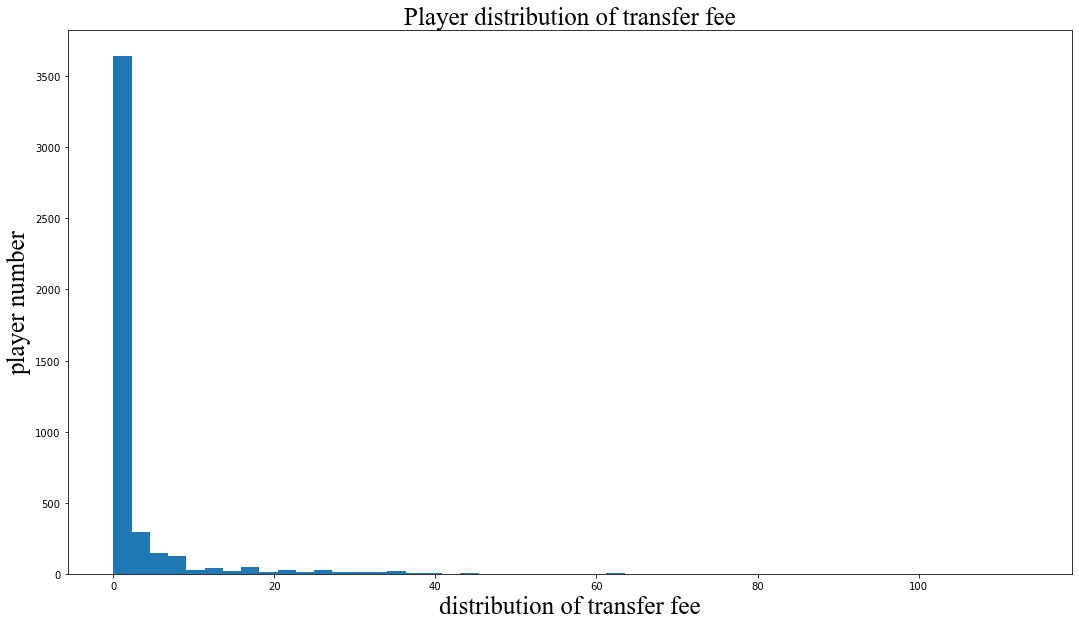

In [5]:
fig,axes = plt.subplots(1,1,figsize=(18,10))
font2 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 25,
}
axes.set_xlabel('distribution of transfer fee',font2)
axes.set_ylabel('player number',font2)
axes.set_title('Player distribution of transfer fee',font2)
_ , _ , _ = plt.hist(learning_df.fee_cleaned,histtype='stepfilled',stacked=True,bins=50)
plt.show()

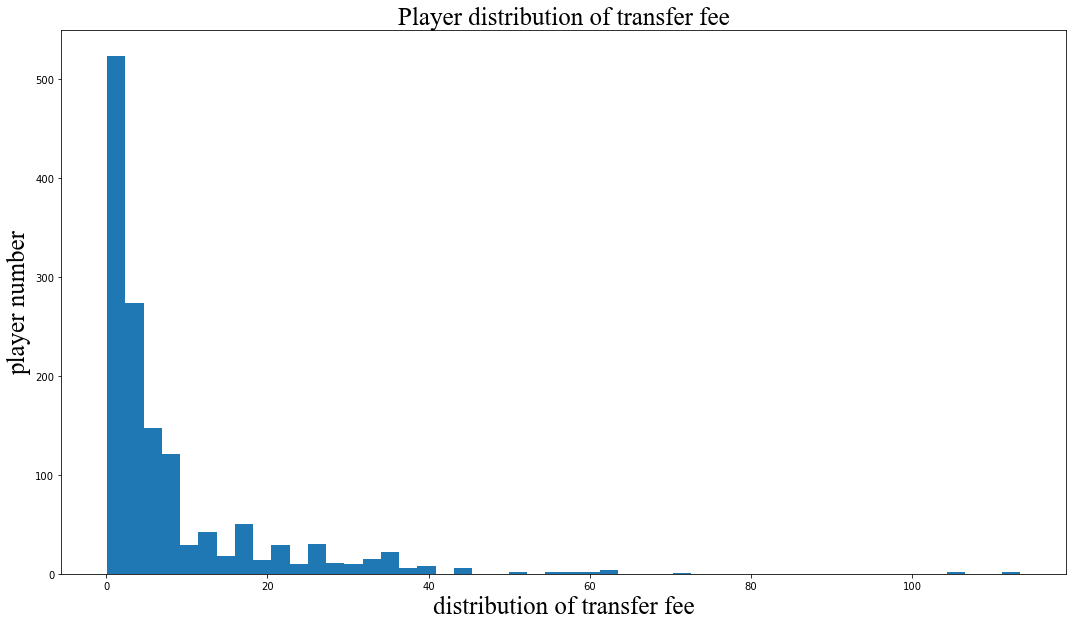

In [6]:
new_learning_df=learning_df[learning_df.fee_cleaned>0]
fig,axes = plt.subplots(1,1,figsize=(18,10))
font2 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 25,
}
axes.set_xlabel('distribution of transfer fee',font2)
axes.set_ylabel('player number',font2)
axes.set_title('Player distribution of transfer fee',font2)
_ , _ , _ = plt.hist(new_learning_df.fee_cleaned,histtype='stepfilled',stacked=True,bins=50)
plt.show()

In [7]:
learning_df['fee_class']=-1
for index in learning_df.index:
    if learning_df.fee_cleaned[index]<=1 and learning_df.fee_cleaned[index]>0:
        learning_df.fee_class[index]=0
    if learning_df.fee_cleaned[index]<=3 and learning_df.fee_cleaned[index]>1:
        learning_df.fee_class[index]=1
    if learning_df.fee_cleaned[index]<=8 and learning_df.fee_cleaned[index]>3:
        learning_df.fee_class[index]=2
    if learning_df.fee_cleaned[index]>8 and learning_df.fee_cleaned[index]<=15:
        learning_df.fee_class[index]=3
    if learning_df.fee_cleaned[index]>15:
        learning_df.fee_class[index]=4

D:\anaconda\envs\ntds_2019\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
D:\anaconda\envs\ntds_2019\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
D:\anaconda\envs\ntds_2019\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\anaconda\envs\ntds_2019\lib\s

In [8]:
learning_df.fee_class.value_counts()

-1    3400
 2     398
 1     314
 0     299
 4     234
 3     137
Name: fee_class, dtype: int64

In [9]:
learning_df=learning_df[learning_df.fee_class!=-1]
learning_df.fee_class.value_counts()

2    398
1    314
0    299
4    234
3    137
Name: fee_class, dtype: int64

## With Graph Property

In [10]:
select_features=['age','position','transfer_movement','league_name', 'year','clustring_coef1','degree_centrality1',\
         'closeness_centrality1', 'pagerank1', 'betweenness_centrality1', 'clustring_coef2', 'degree_centrality2',\
         'closeness_centrality2', 'pagerank2', 'betweenness_centrality2', 'height_cm', 'weight_kg', 'overall', 'potential',\
         'value_eur', 'wage_eur', 'international_reputation']
features=pd.get_dummies(learning_df[select_features])
labels=learning_df['fee_class']

In [11]:
features=np.array(features)
labels=np.array(labels)

In [12]:
import keras
from random import shuffle
temp_index=[i for i in range(len(features))]
shuffle(temp_index)
split_index=round(len(features)*0.9)
x_train=features[temp_index[:split_index]]
y_train=labels[temp_index[:split_index]]
x_val=features[temp_index[split_index:]]
y_val=labels[temp_index[split_index:]]
y_train = keras.utils.to_categorical(y_train)
y_val = keras.utils.to_categorical(y_val)

In [13]:
len(x_train[0])

41

In [14]:

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization, Activation, Reshape
from keras.optimizers import SGD, Adam
import os
import tensorflow as tf
import keras.backend.tensorflow_backend as KTF
from keras import regularizers

In [15]:


# build MLP models with desired hyperparameters and layers
def create_mlp(optimizer, lr=0.01,
                      input_dim=41, hidden_dim=64, output_dim=5,
                      hidden_activation='relu',
                      output_activation='softmax',
                      loss_fn='categorical_crossentropy',metrics=['acc'],
                      kernel_reg = regularizers.l1(0.001),
                      bias_reg = regularizers.l1(0.001),
                      batchNormalization = True,
                      drop_prob = 0):
    
    model = Sequential()
    #model.add(Reshape((1875,), input_shape=(25,25,3)))
    model.add(Dense(hidden_dim, 
                    input_dim=input_dim, )) #activity_regularizer=regularizers.l2(0.001)
    if(batchNormalization):
        model.add(BatchNormalization())
    model.add(Activation(hidden_activation))
    # here we did not need dropout from the input layer which will reduce information
        
    for i in range(1):
        model.add(Dense(hidden_dim, input_dim=hidden_dim))
        if(batchNormalization):
            model.add(BatchNormalization())
        model.add(Activation(hidden_activation))
        if(drop_prob != 0):
            model.add(Dropout(drop_prob))
    model.add(Dense(output_dim, input_dim=hidden_dim, activation = output_activation))
    model.compile(loss = loss_fn, optimizer = optimizer, metrics = metrics)
    return model

In [16]:
model_naive_mlp  = create_mlp( 'Adam',hidden_dim=64,
                                      batchNormalization = False)

model_naive_mlp.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                2688      
_________________________________________________________________
activation_1 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
activation_2 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 325       
Total params: 7,173
Trainable params: 7,173
Non-trainable params: 0
_________________________________________________________________


In [17]:
len(x_val[0])

41

In [18]:
model_naive_mlp_history = model_naive_mlp.fit(x_train, y_train,
                                            batch_size=128,
                                            epochs=100,
                                            validation_data = (x_val, y_val),
                                            
                                            )

Train on 1244 samples, validate on 138 samples
Epoch 1/100
1244/1244 [==============================] - 1s 404us/step - loss: 423119.7801 - acc: 0.2090 - val_loss: 223627.1925 - val_acc: 0.3043
Epoch 2/100
1244/1244 [==============================] - 0s 17us/step - loss: 180280.5402 - acc: 0.2130 - val_loss: 91488.9614 - val_acc: 0.1377
Epoch 3/100
1244/1244 [==============================] - 0s 15us/step - loss: 69704.8372 - acc: 0.2082 - val_loss: 56088.4952 - val_acc: 0.1377
Epoch 4/100
1244/1244 [==============================] - 0s 28us/step - loss: 43641.8145 - acc: 0.2010 - val_loss: 36933.7019 - val_acc: 0.2101
Epoch 5/100
1244/1244 [==============================] - 0s 31us/step - loss: 31233.7930 - acc: 0.2130 - val_loss: 28561.4617 - val_acc: 0.1377
Epoch 6/100
1244/1244 [==============================] - 0s 26us/step - loss: 17957.2664 - acc: 0.2018 - val_loss: 24163.0693 - val_acc: 0.1449
Epoch 7/100
1244/1244 [==============================] - 0s 29us/step - loss: 16358.4

1244/1244 [==============================] - 0s 32us/step - loss: 13085.2657 - acc: 0.2251 - val_loss: 6192.8875 - val_acc: 0.2681
Epoch 58/100
1244/1244 [==============================] - 0s 18us/step - loss: 10355.9570 - acc: 0.2444 - val_loss: 14637.1782 - val_acc: 0.1957
Epoch 59/100
1244/1244 [==============================] - 0s 32us/step - loss: 21546.1522 - acc: 0.1953 - val_loss: 20314.1716 - val_acc: 0.2971
Epoch 60/100
1244/1244 [==============================] - 0s 33us/step - loss: 23982.9414 - acc: 0.2026 - val_loss: 16746.9171 - val_acc: 0.2971
Epoch 61/100
1244/1244 [==============================] - 0s 19us/step - loss: 25813.5598 - acc: 0.2010 - val_loss: 22173.2744 - val_acc: 0.3043
Epoch 62/100
1244/1244 [==============================] - 0s 33us/step - loss: 18022.6262 - acc: 0.2363 - val_loss: 17492.8378 - val_acc: 0.2971
Epoch 63/100
1244/1244 [==============================] - 0s 33us/step - loss: 22810.8526 - acc: 0.1841 - val_loss: 24280.0480 - val_acc: 0.1594

In [19]:
model_bn_mlp  = create_mlp( 'Adam',hidden_dim=64,
                                      batchNormalization = True, drop_prob=0)

model_bn_mlp.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                2688      
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
activation_3 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                256       
_________________________________________________________________
activation_4 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 5)                

In [20]:
model_bn_mlp_history = model_bn_mlp.fit(x_train, y_train,
                                            batch_size=128,
                                            epochs=100,
                                            validation_data = (x_val, y_val),
                                            
                                            )

Train on 1244 samples, validate on 138 samples
Epoch 1/100
1244/1244 [==============================] - 0s 245us/step - loss: 1.6521 - acc: 0.2564 - val_loss: 1.8188 - val_acc: 0.1522
Epoch 2/100
1244/1244 [==============================] - 0s 48us/step - loss: 1.5259 - acc: 0.3095 - val_loss: 1.7146 - val_acc: 0.1957
Epoch 3/100
1244/1244 [==============================] - 0s 43us/step - loss: 1.4838 - acc: 0.3336 - val_loss: 1.7583 - val_acc: 0.2609
Epoch 4/100
1244/1244 [==============================] - 0s 44us/step - loss: 1.4758 - acc: 0.3457 - val_loss: 1.6779 - val_acc: 0.2246
Epoch 5/100
1244/1244 [==============================] - 0s 49us/step - loss: 1.4564 - acc: 0.3513 - val_loss: 1.6020 - val_acc: 0.1884
Epoch 6/100
1244/1244 [==============================] - 0s 45us/step - loss: 1.4648 - acc: 0.3376 - val_loss: 1.5935 - val_acc: 0.1739
Epoch 7/100
1244/1244 [==============================] - 0s 40us/step - loss: 1.4528 - acc: 0.3424 - val_loss: 1.5602 - val_acc: 0.1957


1244/1244 [==============================] - 0s 47us/step - loss: 1.4228 - acc: 0.3682 - val_loss: 1.4812 - val_acc: 0.2754
Epoch 61/100
1244/1244 [==============================] - 0s 50us/step - loss: 1.4342 - acc: 0.3561 - val_loss: 1.4485 - val_acc: 0.3116
Epoch 62/100
1244/1244 [==============================] - 0s 47us/step - loss: 1.4223 - acc: 0.3770 - val_loss: 1.4675 - val_acc: 0.2899
Epoch 63/100
1244/1244 [==============================] - 0s 51us/step - loss: 1.4299 - acc: 0.3641 - val_loss: 1.4745 - val_acc: 0.3116
Epoch 64/100
1244/1244 [==============================] - 0s 32us/step - loss: 1.4351 - acc: 0.3633 - val_loss: 1.5554 - val_acc: 0.2319
Epoch 65/100
1244/1244 [==============================] - 0s 40us/step - loss: 1.4356 - acc: 0.3521 - val_loss: 1.6051 - val_acc: 0.2464
Epoch 66/100
1244/1244 [==============================] - 0s 37us/step - loss: 1.4285 - acc: 0.3537 - val_loss: 1.5584 - val_acc: 0.2464
Epoch 67/100
1244/1244 [==============================

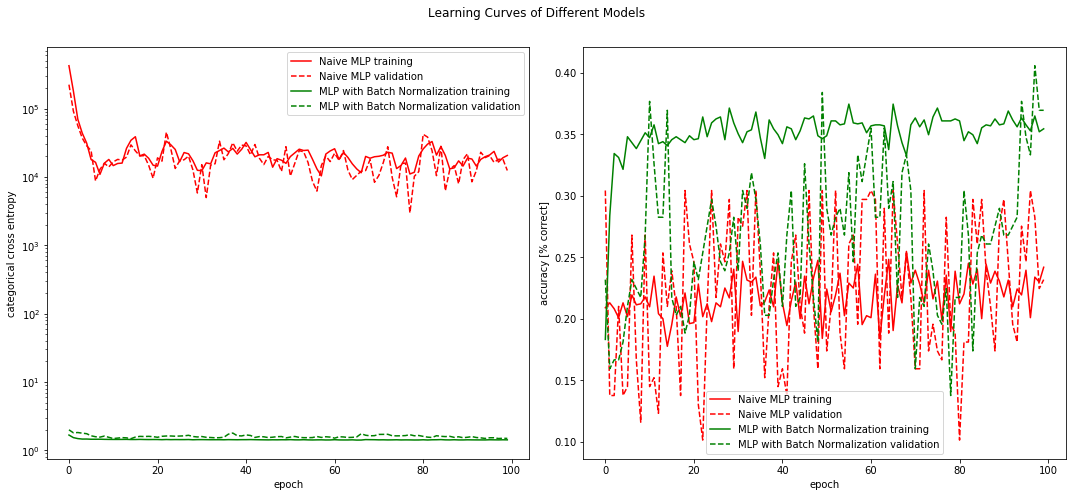

In [35]:
plot_2_different_histories(model_naive_mlp_history, model_bn_mlp_history,
                         label_1='Naive MLP',label_2='MLP with Batch Normalization',
                         title='Learning Curves of Different Models')

# Without Graph feature

In [22]:
select_features=['age','position','transfer_movement','league_name', 'year',\
                 'height_cm', 'weight_kg', 'overall', 'potential',\
         'value_eur', 'wage_eur', 'international_reputation']
features=pd.get_dummies(learning_df[select_features])
labels=learning_df['fee_class']

In [23]:
features=np.array(features)
labels=np.array(labels)

In [24]:
import keras
from random import shuffle
temp_index=[i for i in range(len(features))]
shuffle(temp_index)
split_index=round(len(features)*0.9)
x_train=features[temp_index[:split_index]]
y_train=labels[temp_index[:split_index]]
x_val=features[temp_index[split_index:]]
y_val=labels[temp_index[split_index:]]
y_train = keras.utils.to_categorical(y_train)
y_val = keras.utils.to_categorical(y_val)

In [25]:
import keras
from random import shuffle
temp_index=[i for i in range(len(features))]
shuffle(temp_index)
split_index=round(len(features)*0.9)
x_train=features[temp_index[:split_index]]
y_train=labels[temp_index[:split_index]]
x_val=features[temp_index[split_index:]]
y_val=labels[temp_index[split_index:]]
y_train = keras.utils.to_categorical(y_train)
y_val = keras.utils.to_categorical(y_val)

In [26]:
len(x_val[0])

31

In [27]:
model_naive_mlp_2  = create_mlp( 'Adam',hidden_dim=64,input_dim=31,
                                      batchNormalization = False)

model_naive_mlp_2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 64)                2048      
_________________________________________________________________
activation_5 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4160      
_________________________________________________________________
activation_6 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 5)                 325       
Total params: 6,533
Trainable params: 6,533
Non-trainable params: 0
_________________________________________________________________


In [28]:
model_naive_mlp_history_2 = model_naive_mlp_2.fit(x_train, y_train,
                                            batch_size=128,
                                            epochs=100,
                                            validation_data = (x_val, y_val),
                                            
                                            )

Train on 1244 samples, validate on 138 samples
Epoch 1/100
1244/1244 [==============================] - 0s 102us/step - loss: 882887.5926 - acc: 0.2010 - val_loss: 570969.8605 - val_acc: 0.2391
Epoch 2/100
1244/1244 [==============================] - 0s 25us/step - loss: 335450.6207 - acc: 0.2291 - val_loss: 162470.2272 - val_acc: 0.1739
Epoch 3/100
1244/1244 [==============================] - 0s 40us/step - loss: 148462.1462 - acc: 0.1744 - val_loss: 54742.3356 - val_acc: 0.2319
Epoch 4/100
1244/1244 [==============================] - 0s 29us/step - loss: 35651.8092 - acc: 0.2203 - val_loss: 16967.8449 - val_acc: 0.2609
Epoch 5/100
1244/1244 [==============================] - 0s 30us/step - loss: 22294.9241 - acc: 0.2227 - val_loss: 32391.7982 - val_acc: 0.2246
Epoch 6/100
1244/1244 [==============================] - 0s 29us/step - loss: 20883.5317 - acc: 0.2243 - val_loss: 25689.6775 - val_acc: 0.1377
Epoch 7/100
1244/1244 [==============================] - 0s 29us/step - loss: 29772

1244/1244 [==============================] - 0s 26us/step - loss: 25166.4651 - acc: 0.2219 - val_loss: 25245.7271 - val_acc: 0.2391
Epoch 58/100
1244/1244 [==============================] - 0s 21us/step - loss: 32018.7710 - acc: 0.2259 - val_loss: 43726.9573 - val_acc: 0.2391
Epoch 59/100
1244/1244 [==============================] - 0s 31us/step - loss: 26134.5533 - acc: 0.1994 - val_loss: 17948.0430 - val_acc: 0.1377
Epoch 60/100
1244/1244 [==============================] - 0s 28us/step - loss: 24413.3596 - acc: 0.2323 - val_loss: 28532.5462 - val_acc: 0.2319
Epoch 61/100
1244/1244 [==============================] - 0s 22us/step - loss: 34790.7483 - acc: 0.1833 - val_loss: 74668.8268 - val_acc: 0.2319
Epoch 62/100
1244/1244 [==============================] - 0s 20us/step - loss: 49444.8161 - acc: 0.2090 - val_loss: 47037.2292 - val_acc: 0.1739
Epoch 63/100
1244/1244 [==============================] - 0s 27us/step - loss: 26906.4655 - acc: 0.2291 - val_loss: 34599.2091 - val_acc: 0.137

In [29]:
model_bn_mlp_2  = create_mlp( 'Adam',hidden_dim=64,input_dim=31,
                                      batchNormalization = True, drop_prob=0)

model_bn_mlp_2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 64)                2048      
_________________________________________________________________
batch_normalization_3 (Batch (None, 64)                256       
_________________________________________________________________
activation_7 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)                4160      
_________________________________________________________________
batch_normalization_4 (Batch (None, 64)                256       
_________________________________________________________________
activation_8 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 5)                

In [30]:
model_bn_mlp_history_2 = model_bn_mlp_2.fit(x_train, y_train,
                                            batch_size=128,
                                            epochs=100,
                                            validation_data = (x_val, y_val),
                                            
                                            )

Train on 1244 samples, validate on 138 samples
Epoch 1/100
1244/1244 [==============================] - 0s 298us/step - loss: 1.6732 - acc: 0.1833 - val_loss: 1.9940 - val_acc: 0.2319
Epoch 2/100
1244/1244 [==============================] - 0s 49us/step - loss: 1.5338 - acc: 0.2838 - val_loss: 1.8047 - val_acc: 0.1594
Epoch 3/100
1244/1244 [==============================] - 0s 42us/step - loss: 1.4847 - acc: 0.3344 - val_loss: 1.8211 - val_acc: 0.1667
Epoch 4/100
1244/1244 [==============================] - 0s 53us/step - loss: 1.4610 - acc: 0.3312 - val_loss: 1.7827 - val_acc: 0.1667
Epoch 5/100
1244/1244 [==============================] - 0s 56us/step - loss: 1.4624 - acc: 0.3215 - val_loss: 1.7508 - val_acc: 0.1812
Epoch 6/100
1244/1244 [==============================] - 0s 47us/step - loss: 1.4522 - acc: 0.3481 - val_loss: 1.6315 - val_acc: 0.2101
Epoch 7/100
1244/1244 [==============================] - 0s 38us/step - loss: 1.4519 - acc: 0.3432 - val_loss: 1.5812 - val_acc: 0.2319


1244/1244 [==============================] - 0s 47us/step - loss: 1.4187 - acc: 0.3513 - val_loss: 1.5616 - val_acc: 0.3333
Epoch 61/100
1244/1244 [==============================] - 0s 36us/step - loss: 1.4301 - acc: 0.3569 - val_loss: 1.5068 - val_acc: 0.3551
Epoch 62/100
1244/1244 [==============================] - 0s 46us/step - loss: 1.4195 - acc: 0.3577 - val_loss: 1.5800 - val_acc: 0.2826
Epoch 63/100
1244/1244 [==============================] - 0s 37us/step - loss: 1.4182 - acc: 0.3577 - val_loss: 1.5680 - val_acc: 0.2826
Epoch 64/100
1244/1244 [==============================] - 0s 47us/step - loss: 1.4181 - acc: 0.3569 - val_loss: 1.5414 - val_acc: 0.3551
Epoch 65/100
1244/1244 [==============================] - 0s 38us/step - loss: 1.4238 - acc: 0.3376 - val_loss: 1.5484 - val_acc: 0.2899
Epoch 66/100
1244/1244 [==============================] - 0s 43us/step - loss: 1.4120 - acc: 0.3746 - val_loss: 1.5718 - val_acc: 0.3116
Epoch 67/100
1244/1244 [==============================

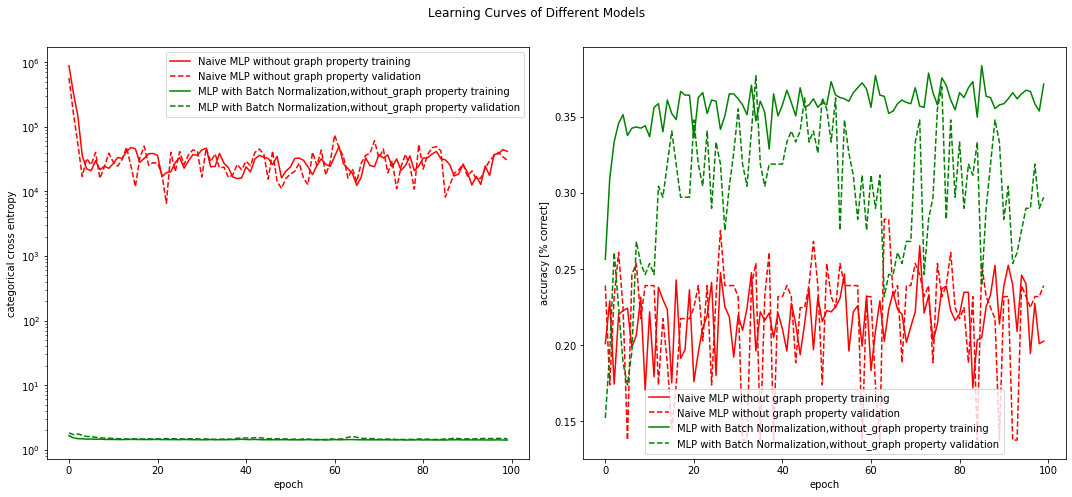

In [34]:
plot_2_different_histories(model_naive_mlp_history_2, model_bn_mlp_history_2,
                         label_1='Naive MLP without graph property',label_2='MLP with Batch Normalization,without_graph property',
                         title='Learning Curves of Different Models')

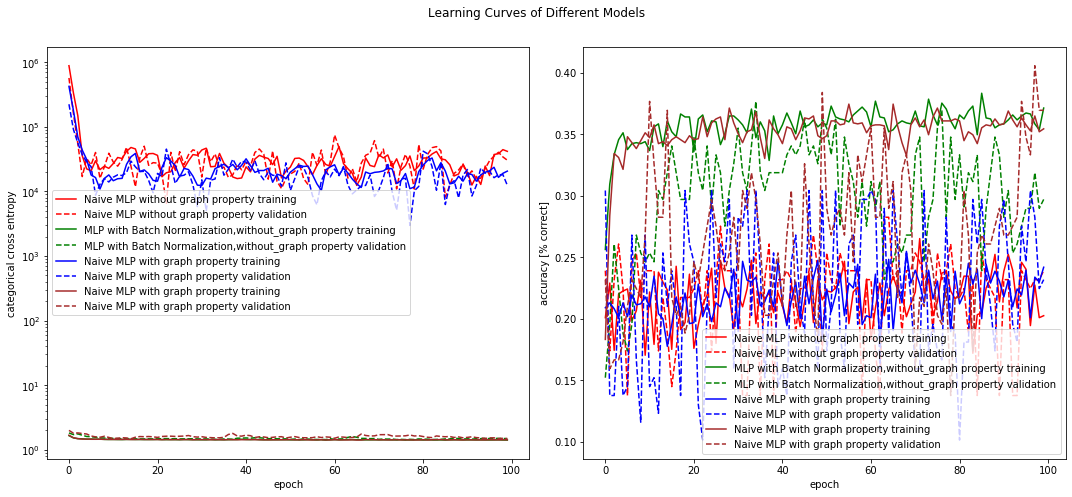

In [33]:
plot_different_histories(model_naive_mlp_history_2, model_bn_mlp_history_2,model_naive_mlp_history,model_bn_mlp_history,
                         label_1='Naive MLP without graph property',label_2='MLP with Batch Normalization,without_graph property',
                          label_3='Naive MLP with graph property',label_4='MLP with Batch Normalization,with property',
                         title='Learning Curves of Different Models')